## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
# prepare iris data set
iris = datasets.load_iris()
print("Data shape: ", iris.data.shape)

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

Data shape:  (150, 4)


In [3]:
clf = DecisionTreeClassifier(
#     random_state = 0,
    criterion = "gini",
    max_depth = 3,
    min_samples_split = 5,
    min_samples_leaf = 10
)

cross_val_score(clf, iris.data, iris.target, cv=10).mean()

0.9533333333333334

In [4]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("depth: {}, leaves: {}".format(clf.get_depth(), clf.get_n_leaves()))
print("acc: {:.2f}".format(accuracy_score(y_test, y_pred)))

depth: 3, leaves: 5
acc: 0.93


In [5]:
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.         0.53667077 0.46332923]


In [6]:
# prepare boston data set
boston = datasets.load_boston()
print("Data shape: ", boston.data.shape)

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)

Data shape:  (506, 13)


In [7]:
reg = DecisionTreeRegressor(
#     random_state = 0,
#     criterion = "gini",
    max_depth = 15,
#     min_samples_split = 5,
#     min_samples_leaf = 3
)

In [8]:
cross_val_score(reg, boston.data, boston.target, cv=5)

array([ 0.67909635,  0.41933174,  0.66063194,  0.3812046 , -1.7701961 ])

In [9]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print("depth: {}, leaves: {}".format(reg.get_depth(), reg.get_n_leaves()))
print("r_square: {:.2f}".format(reg.score(x_test, y_test)))

depth: 15, leaves: 348
r_square: 0.67


In [10]:
# Apply Ridge on Boston data set 
alpha = [1e-4, 1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3]
train_err = []
test_err = []

for a in alpha:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    train_err.append(ridge.score(x_train, y_train))
    test_err.append(ridge.score(x_test, y_test))

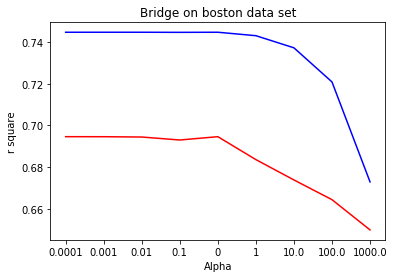

In [11]:
x = []
for a in alpha:
    x.append(str(a))

plt.title("Bridge on boston data set")
plt.xlabel("Alpha")
plt.ylabel("r square")
    
plt.plot(x, train_err, color='blue')
plt.plot(x, test_err, color='red')
plt.show()

In [12]:
# prepare wine data set
wine = datasets.load_wine()
print("Data shape: ", wine.data.shape)

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)

Data shape:  (178, 13)


In [13]:
clf = DecisionTreeClassifier(
#     random_state = 0,
    criterion = "gini",
    max_depth = 3,
    min_samples_split = 5,
    min_samples_leaf = 10
)

cross_val_score(clf, iris.data, iris.target, cv=10).mean()

0.9533333333333334

In [14]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("depth: {}, leaves: {}".format(clf.get_depth(), clf.get_n_leaves()))
print("acc: {:.2f}".format(accuracy_score(y_test, y_pred)))

depth: 3, leaves: 7
acc: 0.97


In [15]:
print(wine.feature_names)
print("Feature importance: ", clf.feature_importances_)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.00201302 0.         0.         0.         0.01468893 0.
 0.45284013 0.         0.         0.07021632 0.         0.
 0.4602416 ]


In [16]:
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

C:\Users\pclightyear\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pclightyear\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [17]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9166666666666666
